In [140]:
import pandas as pd
import numpy as np

import random
from time import time

from scipy.stats import randint as sp_randint

import pickle
from sklearn.externals import joblib

from sklearn.preprocessing import scale, StandardScaler

from sklearn.cross_validation import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

from sklearn.grid_search import RandomizedSearchCV

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [141]:
with open('master_data.pkl','rb') as picklefile:
    df = pickle.load(picklefile)

In [159]:
df.to_csv("master_data.csv")

In [82]:
def indicator(x):
    if x >= 0.66:
        return 1
    else:
        return 0

In [83]:
df['target'] = df['share_uber'].apply(indicator)

In [84]:
df.target.sum()/len(df)

0.2698492462311558

In [85]:
df.columns

Index(['GEOID', 'share_uber', 'airbnb_accommodates', 'airbnb_bathrooms',
       'airbnb_bedrooms', 'airbnb_beds', 'airbnb_dailyrate',
       'airbnb_number_of_reviews', 'airbnb_review_scores_location',
       'airbnb_review_scores_rating', 'airbnb_airbnb_listings',
       'demo_Total Population', 'demo_Total households',
       'demo_family households', 'demo_nonfamily households',
       'demo_income per capita', 'demo_total housing units',
       'demo_owner  occupied units', 'demo_median house value',
       'demo_renter occupied units', 'demo_median rent',
       'demo_transportation car', 'demo_number of cars',
       'demo_transportation public', 'demo_tranportation motorcycle',
       'demo_transportation bicyle', 'demo_transportation walk',
       'demo_ Same house 1 year ago',
       'demo_ Different house in United States 1 year ago',
       'demo_abroad_1_year_ago', 'demo_ Bachelor's degree',
       'demo_ Master's degree', 'demo_ Professional school degree',
       'demo_ D

In [86]:
target = df.target
df = df.drop(['target',
              'GEOID',
              'share_uber'],axis=1)

In [87]:
features = df

In [88]:
# drop features here:
features = features.drop(['airbnb_beds',
                          'airbnb_dailyrate',
                          'airbnb_number_of_reviews',
                          'demo_number of cars',
                          'demo_transportation car',
                          'demo_ Different house in United States 1 year ago',
                          'demo_ Professional school degree',
                          'yelp_bar_coffee_count',
                          'demo_family households',
                          'demo_Total households',
                          'demo_median rent',
                          'yelp_bar_rating',
                          'yelp_bar_bar_count',
                          'airbnb_bathrooms',
                          'demo_ Doctorate degree',
                          'yelp_bar_GEOID',
                          'demo_total housing units',
                          'demo_Total households',
                          'airbnb_review_scores_location',
                          'airbnb_bedrooms',
                          'airbnb_review_scores_rating',
                          'airbnb_accommodates',
                          'demo_ Same house 1 year ago',
                          "demo_ Bachelor's degree",
                          'demo_transportation walk',
                          'demo_tranportation motorcycle',
                          'demo_Total Population'],axis=1)

# 'GEOID', 
# 'share_uber', 
# 'airbnb_accommodates', 
# 'airbnb_bathrooms',
# 'airbnb_bedrooms', 
# 'airbnb_beds',
# 'airbnb_dailyrate',
# 'airbnb_number_of_reviews',
# 'airbnb_review_scores_location',
# 'airbnb_review_scores_rating', 
# 'airbnb_airbnb_listings',
# 'demo_Total Population', 
# 'demo_Total households',
# 'demo_family households',
# 'demo_nonfamily households',
# 'demo_income per capita', 
# 'demo_total housing units',
# 'demo_owner  occupied units',
# 'demo_median house value',
# 'demo_renter occupied units',
# 'demo_median rent',
# 'demo_transportation car',
# 'demo_number of cars',
# 'demo_transportation public', 
# 'demo_tranportation motorcycle',
# 'demo_transportation bicyle', 
# 'demo_transportation walk',
# 'demo_ Same house 1 year ago',
# 'demo_ Different house in United States 1 year ago',
# 'demo_abroad_1_year_ago', 
# "demo_ Bachelor's degree",
# "demo_ Master's degree",
# 'demo_ Professional school degree',
# 'demo_ Doctorate degree', 
# 'demo_ Median monthly housing costs',
# 'complaint_count',
# 'yelp_bar_rating', 
# 'yelp_bar_review_count',
# 'yelp_bar_bar_count',
# 'yelp_bar_GEOID', 
# 'yelp_bar_coffee_count',
# '5_year_change', 
# 'target'

In [89]:
features['RANDOM'] = [random.random() for i in range(len(features))]
features.head()

,airbnb_airbnb_listings,demo_nonfamily households,demo_income per capita,demo_owner occupied units,demo_median house value,demo_renter occupied units,demo_transportation public,demo_transportation bicyle,demo_abroad_1_year_ago,demo_ Master's degree,demo_ Median monthly housing costs,complaint_count,yelp_bar_review_count,5_year_change,RANDOM
1,0.0,213.0,22971.0,802.0,410400.0,577.0,712.0,0.0,2090.0,77.0,1462.0,170.0,0.0,-0.930070,0.222030
2,9.0,357.0,29803.0,1312.0,354100.0,480.0,1168.0,0.0,2526.0,376.0,1918.0,244.0,5.0,-0.740385,0.727951
3,0.0,596.0,18544.0,375.0,418300.0,1529.0,918.0,0.0,1923.0,119.0,988.0,548.0,0.0,-0.804511,0.566019
4,0.0,366.0,16168.0,62.0,360000.0,764.0,688.0,6.0,920.0,65.0,1111.0,13.0,0.0,-0.859873,0.672648
5,3.0,782.0,14052.0,498.0,370800.0,2460.0,1944.0,0.0,2886.0,196.0,684.0,1290.0,0.0,-0.764045,0.161066


In [90]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [91]:
X_train = scale(X_train)
X_test = scale(X_test)

In [146]:
models = {}

# models['KNN'] = KNeighborsClassifier()
# models['LR'] = LogisticRegression()
# models['SVC'] = SVC()
# models['DecisionTree'] = DecisionTreeClassifier()
models['GradientBoost'] = GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=2, max_leaf_nodes=None,
              min_samples_leaf=9, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
# models['AdaBoost'] = AdaBoostClassifier()
# models['RandomForest'] = RandomForestClassifier()

# RFparams = {n_estimators=1000,n_jobs=4, max_features=5,
#               class_weight='balanced_subsample',max_depth=10}

In [147]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, n_jobs=1, cv = 10)
    precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision')
    recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
    f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
    print('Model: ' + name)
    print('Accuracy: ' + str(np.mean(scores)))
    print('Precision: ' + str(np.mean(precision)))
    print('Recall: ' + str(np.mean(recall)))
    print('f1: ' + str(np.mean(f1)))
    print("")

Model: GradientBoost
Accuracy: 0.815460550814
Precision: 0.725205079084
Recall: 0.474751066856
f1: 0.586759476862



In [148]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    print('Model: ' + name)
    print(classification_report(y_test,y_pred))
    print("")

Model: GradientBoost
             precision    recall  f1-score   support

          0       0.83      0.95      0.89       439
          1       0.76      0.47      0.58       158

avg / total       0.81      0.82      0.81       597




In [149]:
def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec,label=name)
    plt.legend()
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    return (recallvec, precisionvec, threshvec)

In [150]:
models_roc = {}

# models_roc['KNN'] = KNeighborsClassifier()
# models_roc['LR'] = LogisticRegression()
# models_roc['DecisionTree'] = DecisionTreeClassifier()
models_roc['GradientBoost'] = GradientBoostingClassifier()
# models_roc['AdaBoost'] = AdaBoostClassifier()
# models_roc['RandomForest'] = RandomForestClassifier()

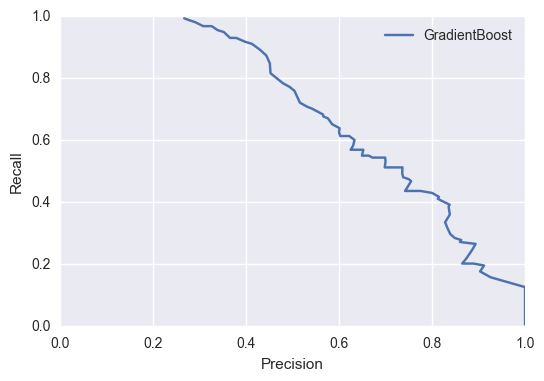

In [151]:
for name, model in models_roc.items():
    model.fit(X_train, y_train)
    recallvec, precisionvec, threshvec = pr_curve(y_test,model.predict_proba(X_test)[:,1])

Model:  GradientBoost
ROC:  0.832689368819



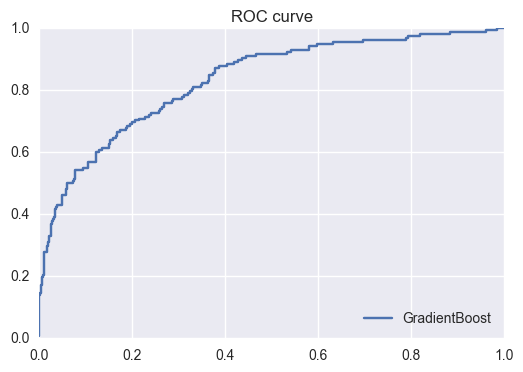

In [152]:
for name, model in models_roc.items():
    model.fit(X_train, y_train)
    y_pred = np.asarray(model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(np.asarray(y_test),y_pred)
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.title('ROC curve')
    print('Model: ', name)
    print('ROC: ', roc_auc_score(y_test,y_pred))
    print("")

### Feature importance test

In [153]:
models_fi = {}

# models_fi['DecisionTree'] = DecisionTreeClassifier()
models_fi['GradientBoost'] = GradientBoostingClassifier()
# models_fi['AdaBoost'] = AdaBoostClassifier()
# models_fi['RandomForest'] = RandomForestClassifier()

In [155]:
for name, model in models_fi.items():
    model.fit(X_train, y_train)
    sorted_features = sorted(zip(features,model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    print('Model: ',name)
    for feature in sorted_features:
        print(feature)
    
    print("")

Model:  GradientBoost
('demo_ Median monthly housing costs', 0.11719000971405792)
('airbnb_airbnb_listings', 0.09518552217174317)
('5_year_change', 0.093595254324106508)
('demo_owner  occupied units', 0.093278130862698955)
('complaint_count', 0.093073497315788192)
('demo_median house value', 0.083425923493809909)
('demo_income per capita', 0.065903891796503092)
('yelp_bar_review_count', 0.054455917328193319)
('RANDOM', 0.051956077829563505)
('demo_abroad_1_year_ago', 0.050645212971083015)
('demo_nonfamily households', 0.050490731893343917)
("demo_ Master's degree", 0.047795056749447146)
('demo_transportation public', 0.047297737731688605)
('demo_transportation bicyle', 0.029476066097558883)
('demo_renter occupied units', 0.026230969720413898)



In [156]:
t_reg = sm.Logit(y_train,X_train).fit_regularized(alpha=0.1,maxiter=10000,
                                                 qc_verbose=True, trim_mode='size',
                                                size_trim_tol =0.1)
t_reg.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.584246537801
            Iterations: 142
            Function evaluations: 142
            Gradient evaluations: 142


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1393
Model:                          Logit   Df Residuals:                     1381
Method:                           MLE   Df Model:                           11
Date:                Fri, 28 Oct 2016   Pseudo R-squ.:                0.001423
Time:                        00:07:28   Log-Likelihood:                -814.18
converged:                       True   LL-Null:                       -815.34
                                        LLR p-value:                    0.9970
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.7348      0.138     -5.312      0.000        -1.006    -0.464
x2             0.3455      0.257      1.342      0.179        -0.159     0.850
x3             0.1579      0.123      1.282      0.200        -0.083     0.399
x4            -0.2937      0.104     -2.815      0.005        -0.498    -0.089
x5            -0.2965      0.079     -3.757      0.000        -0.451    -0.142
x6             0.2261      0.224      1.009      0.313        -0.213     0.665
x7             0.2153      0.155      1.392      0.164        -0.088     0.518
x8            -0.2338      0.087     -2.683      0.007        -0.405    -0.063
x9                  0        nan        nan        nan           nan       nan
x10           -0.4005      0.185     -2.163      0.031        -0.763    -0.038
x11                 0        nan        nan        nan           nan       nan
x12            0.6293      0.112      5.608      0.000         0.409     0.849
x13            0.2274      0.097      2.346      0.019         0.037     0.417
x14           -0.1806      0.108     -1.668      0.095        -0.393     0.032
x15                 0        nan        nan        nan           nan       nan
==============================================================================
"""

In [157]:
for f in features.columns:
    print(f)

airbnb_airbnb_listings
demo_nonfamily households
demo_income per capita
demo_owner  occupied units
demo_median house value
demo_renter occupied units
demo_transportation public
demo_transportation bicyle
demo_abroad_1_year_ago
demo_ Master's degree
demo_ Median monthly housing costs
complaint_count
yelp_bar_review_count
5_year_change
RANDOM


## Grid search

In [145]:
# tuning gradient boosted tree hyperparameters
gbc = GradientBoostingClassifier()

# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(3, 6),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11)}
            
# run randomized search
n_iter_search = 5000
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
print("Best Estimator" +str(random_search.best_estimator_))
print("Best Scorer" +str(random_search.best_score_))
print("Best Estimator" +str(random_search.best_params_))

RandomizedSearchCV took 901.29 seconds for 5000 candidates parameter settings.
Best EstimatorGradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=2, max_leaf_nodes=None,
              min_samples_leaf=9, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Best Scorer0.824120603015
Best Estimator{'max_features': 2, 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 5}


In [ ]:
# get rid of highly correlated features
# grid search RF using method from Ed

In [ ]:
# pr_curve
# https://github.com/th27/nyc16_ds9/blob/master/class_lectures/week05-mcnulty2/day1/Affair_Predictor_Completed.ipynb
# https://github.com/th27/nyc16_ds9/blob/master/class_lectures/week04-mcnulty1/day3/Random%20forest%20Classification.ipynb